In [61]:
from pandas import DataFrame
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas import read_csv

In [62]:
df = pd.read_csv(r'C:\Users\shubham\Anaconda_Files\USAData.csv')

In [63]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [64]:
df.columns = ['Income', 'Age', 'No_rooms' , 'No_bedrooms' , 'Population' , 'Price' , 'Address']

In [65]:
df.head()

,Income,Age,No_rooms,No_bedrooms,Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


### The idea is to rescale an original variable to have equal range and/or variance.

In [66]:
names = ['Income', 'Age', 'No_rooms' , 'No_bedrooms' , 'Population' , 'Price']
for i in names:
    df[i] = (df[i] - min(df[i])) / (max(df[i]) - min(df[i]))  #normalize variables

In [67]:
features = df[['Income','Age','No_rooms','No_bedrooms', 'Population']]
X = df[['Income','Age','No_rooms','No_bedrooms','Population']] 
Y = df['Price']

### Calculate the VIFs

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(features):
    vif = pd.DataFrame()
    vif["Features"] = features.columns
    vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]    
    return(vif)
vif = calculate_vif(features)
while vif['VIF'][vif['VIF'] > 10].any():
    remove = vif.sort_values('VIF',ascending=0)['Features'][:1]
    features.drop(remove,axis=1,inplace=True)
    vif = calculate_vif(features)
vif

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Features,VIF
0,Age,7.288612
1,No_bedrooms,3.233278
2,Population,7.311429


### Based on VIF drop variable having max VIF. Here it is Population

In [69]:
features = df[['Income','Age','No_rooms','No_bedrooms']]
X = df[['Income','Age','No_rooms','No_bedrooms']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['Price']

### Rerun the VIF again

In [70]:
def calculate_vif(features):
    vif = pd.DataFrame()
    vif["Features"] = features.columns
    vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]    
    return(vif)
vif = calculate_vif(features)
while vif['VIF'][vif['VIF'] > 10].any():
    remove = vif.sort_values('VIF',ascending=0)['Features'][:1]
    features.drop(remove,axis=1,inplace=True)
    vif = calculate_vif(features)
vif

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Features,VIF
0,Income,9.421165
1,Age,8.574574
2,No_bedrooms,3.366220


### Drop Income as have maximum VIF

In [71]:
features = df[['Age','No_rooms','No_bedrooms']]
X = df[['Age','No_rooms','No_bedrooms']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['Price']

### Check VIF round 3

In [72]:
def calculate_vif(features):
    vif = pd.DataFrame()
    vif["Features"] = features.columns
    vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]    
    return(vif)
vif = calculate_vif(features)
while vif['VIF'][vif['VIF'] > 10].any():
    remove = vif.sort_values('VIF',ascending=0)['Features'][:1]
    features.drop(remove,axis=1,inplace=True)
    vif = calculate_vif(features)
vif

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Features,VIF
0,Age,2.971366
1,No_bedrooms,2.971366


### Great ! None of the Variable have VIF > 5. Lets execute Model

In [73]:
#Add Regressor variable
X = df[['Age','No_rooms','No_bedrooms']] 
#Add Intercept variable
#X = sm.add_constant(X) 

Y = df['Price']
model = sm.OLS(Y, X).fit()



In [74]:
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.946
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                          2.915e+04
Date:                Thu, 29 Aug 2019   Prob (F-statistic):                        0.00
Time:                        22:07:50   Log-Likelihood:                          3506.1
No. Observations:                5000   AIC:                                     -7006.
Df Residuals:                    4997   BIC:                                     -6987.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

### As per the model No_Bedrooms is insignificant

### Model Ran without Intercept 

In [75]:
#Add Regressor variable
X = df[['Age','No_rooms']] 
#Add Intercept variable
#X = sm.add_constant(X) 

Y = df['Price']
model = sm.OLS(Y, X).fit()


In [76]:
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.946
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                          4.373e+04
Date:                Thu, 29 Aug 2019   Prob (F-statistic):                        0.00
Time:                        22:08:16   Log-Likelihood:                          3505.9
No. Observations:                5000   AIC:                                     -7008.
Df Residuals:                    4998   BIC:                                     -6995.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [77]:
Min_Age = 2.644
Max_Age = 9.51

Min_No_rooms =3.236
Max_N0_rooms =10.759

Min_Price =15938.659
Max_Price =2469065.594

## Record
Age=4
No_rooms=5

Stand_Age =(Age-Min_Age) / (Max_Age-Min_Age)
Stand_No_rooms = (No_rooms -Min_No_rooms) / (Max_N0_rooms-Min_No_rooms)

Standardized_Price = 0.5374*Stand_Age + 0.4646*Stand_No_rooms
print('The value of standardized price', Standardized_Price)



The value of standardized price 0.21507359838993023


In [78]:
Price =  Stand_Price * (Max_Price-Min_Price) + Min_Price
print('The value of Price', Price)

The value of Price 543541.4962177104


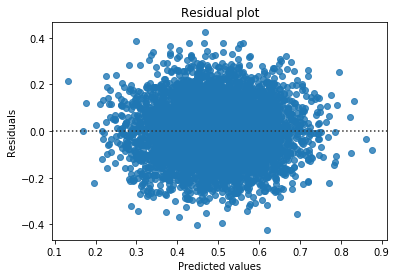

In [79]:
# seaborn residual plot
# seaborn residual plot
import seaborn as sns
import matplotlib.pyplot as plt
sns.residplot(model.fittedvalues, df['Price'], lowess=False, line_kws={'color':'r', 'lw':1})
plt.title('Residual plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals');